# Fashion Product Styles Dataset

This dataset contains structured metadata for fashion products sold on an e‑commerce platform.
Each row corresponds to a single product (SKU) and includes categorical, numeric and descriptive attributes that allow grouping, filtering and exploratory analysis.

## Dataset Fields

| Column | Description |
|--------|-------------|
| **id** | Unique numeric identifier of the product. |
| **gender** | Target gender segment (Men, Women, Boys, Girls, Unisex). |
| **masterCategory** | High‑level merchandise category (e.g. Apparel, Footwear, Accessories, Personal Care). |
| **subCategory** | Mid‑level category under *masterCategory* (e.g. Topwear, Bottomwear, Watches). |
| **articleType** | Specific product type within a *subCategory* (e.g. Shirts, Jeans, Handbags). |
| **baseColour** | Primary colour of the product as perceived by customers. |
| **season** | Intended fashion season (Summer, Winter, Spring, Fall). |
| **year** | Year in which the product was first introduced to the catalogue. |
| **usage** | Typical usage context (Casual, Formal, Sports, Ethnic, etc.). |
| **productDisplayName** | Full display name shown on the storefront (often includes brand + product descriptor). |


In [81]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for creating visualizations
import matplotlib.pyplot as plt

# Import seaborn for creating statistical visualizations
import seaborn as sns

## Loading Data with pandas

We will use the **pandas** library to read data from a CSV file named `styles.csv`.
This file contains metadata for fashion products—such as category, colour, season, and display name—that we will explore and analyse.
By loading the contents into a pandas **DataFrame**, we can conveniently inspect, clean, and manipulate the dataset for further statistical analysis and visualisations.


In [82]:
# Load the dataset from styles.csv into a DataFrame
df = pd.read_csv("styles.csv")

# Display the first 10 records for a quick preview
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


## Converting Column Names to `snake_case`

For consistency and easier access in code, we will rename the DataFrame
columns from their original camel‑/Pascal‑case format to `snake_case`.
The renaming is done **in‑memory only** (no file is rewritten); we simply
update `df.columns` and keep working with the transformed DataFrame.


In [83]:
# Explicit mapping: original_name -> snake_case
snake_mapping = {
    "masterCategory":      "master_category",
    "subCategory":         "sub_category",
    "articleType":         "article_type",
    "baseColour":          "base_colour",
    "productDisplayName":  "product_display_name"
}

# Apply the mapping
df.rename(columns=snake_mapping, inplace=True)

# Optional: verify the result
print(df.columns.tolist())
df.head(5)


['id', 'gender', 'master_category', 'sub_category', 'article_type', 'base_colour', 'season', 'year', 'usage', 'product_display_name']


,id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


## Re‑indexing the DataFrame

The dataset already contains an **`id`** column that stores the original
product identifier.
To keep that information while also creating a sequential row index that
starts at 1 (similar to the example you showed), we will:

1. **Rename** the existing `id` column to `product_id`.
2. **Add** a new column called `id` whose values run consecutively from 1
   to the total number of rows.
3. **Set** this new `id` column as the DataFrame index.

The original product identifiers remain available as `product_id`.


In [84]:
# ---------- Step 1 : preserve the original product identifier ----------
df.rename(columns={"id": "product_id"}, inplace=True)

# ---------- Step 2 : create a sequential row index ----------
df["id"] = range(1, len(df) + 1)

# ---------- Step 3 : make 'id' the index ----------
df.set_index("id", inplace=True)

# Quick sanity check
print(df.index[:5])
df.head(5)


Index([1, 2, 3, 4, 5], dtype='int64', name='id')


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
2,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
3,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
4,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
5,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


## Inspecting Data Types and Column Summary

We now take a quick look at the DataFrame’s schema:
* `df.dtypes` shows the data type of each column.
* `df.info()` provides a concise summary, including non‑null counts and memory usage.


In [85]:
# ---------- Inspect column data types and concise schema ----------

# Print a Series with the dtype of each column
df.dtypes

product_id                int64
gender                   object
master_category          object
sub_category             object
article_type             object
base_colour              object
season                   object
year                    float64
usage                    object
product_display_name     object
dtype: object

In [86]:
# Print a full summary: index dtype, columns, non‑null counts, dtypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44446 entries, 1 to 44446
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            44446 non-null  int64  
 1   gender                44446 non-null  object 
 2   master_category       44446 non-null  object 
 3   sub_category          44446 non-null  object 
 4   article_type          44446 non-null  object 
 5   base_colour           44431 non-null  object 
 6   season                44425 non-null  object 
 7   year                  44445 non-null  float64
 8   usage                 44129 non-null  object 
 9   product_display_name  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


## Optimizing numeric column dtypes

The `product_id` column never exceeds 64 000, and the `year` column ranges only from 2010 to 2024.
We can safely down‑cast these columns to smaller integer types to reduce memory usage:

| Column | Current dtype | Target dtype | Reason                                                         |
| ------ | ------------- | ------------ |----------------------------------------------------------------|
| `product_id` | int64 | UInt16 | Fits in 0 – 65 535; values are non‑negative.                   |
| `year` | float64 (due to NaN) | Int16 (nullable) | Years fit in 16‑bit signed integer and we keep missing values. |


In [87]:
# ---------- Down‑cast numeric columns ----------

# Convert product_id to unsigned 16‑bit integer
df["product_id"] = df["product_id"].astype("UInt16")

# Convert year to nullable signed 16‑bit integer
# First, ensure numeric (it already is), then cast with Pandas' nullable Int16
df["year"] = df["year"].astype("Int16")

# Verify results
print(df[["product_id", "year"]].dtypes)
df.info()

product_id    UInt16
year           Int16
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 44446 entries, 1 to 44446
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            44446 non-null  UInt16
 1   gender                44446 non-null  object
 2   master_category       44446 non-null  object
 3   sub_category          44446 non-null  object
 4   article_type          44446 non-null  object
 5   base_colour           44431 non-null  object
 6   season                44425 non-null  object
 7   year                  44445 non-null  Int16 
 8   usage                 44129 non-null  object
 9   product_display_name  44439 non-null  object
dtypes: Int16(1), UInt16(1), object(8)
memory usage: 3.3+ MB


## Detecting Missing, Blank and Invalid Values

Before further analysis we need to understand data‑quality issues:
* **Missing values** – explicit `NaN`/`None`.
* **Blank strings** – `""` or strings that are only whitespace.
* **Invalid categorical values** – values outside the expected domain
  (e.g. `gender` should be one of *Men, Women, Boys, Girls, Unisex*;
  `season` — *Summer, Winter, Spring, Fall*;
  `year` must be between 2010 and 2024).

The code below builds a compact **quality report** with counts
of each type of problem for every column.


In [88]:
import numpy as np
import pandas as pd

# ---------- helper sets for expected categories ----------
valid_gender  = {"Men", "Women", "Boys", "Girls", "Unisex"}
valid_season  = {"Summer", "Winter", "Spring", "Fall"}
valid_year_lo, valid_year_hi = 2000, 2024

# ---------- function to compute quality metrics ----------
def column_quality(series: pd.Series) -> dict:
    """Return dict with counts of missing, blank and invalid values."""
    missing_cnt = series.isna().sum()

    # blank strings (only for object dtype)
    blank_cnt = 0
    if series.dtype == "object":
        blank_cnt = series.str.strip().eq("").sum()

    # invalid values (rules per column)
    name = series.name
    invalid_cnt = 0
    if name == "gender":
        invalid_cnt = (~series.isna() & ~series.isin(valid_gender)).sum()
    elif name == "season":
        invalid_cnt = (~series.isna() & ~series.isin(valid_season)).sum()
    elif name == "year":
        # nullable Int16 ⇒ convert to numpy array for comparison
        invalid_cnt = (
            series.dropna()
                  .astype(int)
                  .apply(lambda y: y < valid_year_lo or y > valid_year_hi)
                  .sum()
        )

    return {
        "missing": missing_cnt,
        "blank": blank_cnt,
        "invalid": invalid_cnt
    }

# ---------- build quality report ----------
quality_report = (
    df.apply(column_quality)
      .apply(pd.Series)
      .assign(total=lambda d: d.sum(axis=1))
      .sort_values("total", ascending=False)
)

display(quality_report)


,missing,blank,invalid,total
usage,317,0,0,317
season,21,0,0,21
base_colour,15,0,0,15
product_display_name,7,0,0,7
year,1,0,0,1
product_id,0,0,0,0
gender,0,0,0,0
article_type,0,0,0,0
master_category,0,0,0,0
sub_category,0,0,0,0


## Extracting rows that contain at least one missing value

We now isolate every record in the DataFrame that has **any** `NaN`
value in any column. This helps to inspect the problematic rows and
decide on an appropriate cleaning strategy (imputation, deletion,
manual correction, etc.).


In [89]:
# Filter rows that have at least one missing value
rows_with_na = df[df.isna().any(axis=1)]

print(f"Total rows with ≥1 missing value: {rows_with_na.shape[0]}")

# Preview the first few problematic rows
display(rows_with_na.head())

# If you need to inspect everything, uncomment the line below
# display(rows_with_na)


Total rows with ≥1 missing value: 347


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
88,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017,NaN,Streetwear Ash Nail Polish # 31
93,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012,NaN,Just Natural Unisex Charcoal Rain Jacket
283,5402,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011,Sports,Kalenji Ekiden 200 Wn Purple 2011
293,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
480,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...


## Showing five example rows for each column with missing values

Below we iterate over the five columns that contain `NaN`
(`usage`, `season`, `base_colour`, `product_display_name`, `year`) and
display **exactly five records** where each respective column is missing.
This gives us a compact glimpse of the kind of products affected by the
gaps in every attribute.


In [90]:
# Columns we know have missing values
cols_with_na = ["usage",
                "season",
                "base_colour",
                "product_display_name",
                "year"]

for col in cols_with_na:
    print(f"\n--- Example rows where '{col}' is NaN ---")

    # Grab up to five rows with a missing value in this column
    subset = df[df[col].isna()].head(5)

    # Display the sample
    display(subset)



--- Example rows where 'usage' is NaN ---


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
88,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017,NaN,Streetwear Ash Nail Polish # 31
93,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012,NaN,Just Natural Unisex Charcoal Rain Jacket
293,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
480,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
512,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017,NaN,Lakme Sheer Satin Lip Gloss 51



--- Example rows where 'season' is NaN ---


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
283,5402,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011,Sports,Kalenji Ekiden 200 Wn Purple 2011
5998,5389,Unisex,Footwear,Shoes,Sports Shoes,Yellow,NaN,2011,Sports,Kalenji Kapteren 200 Yellow Fw
6512,5380,Women,Footwear,Shoes,Sports Shoes,Purple,NaN,2011,Sports,Quechua Forclaz 100 Lady Purple
12669,5392,Unisex,Footwear,Shoes,Sports Shoes,White,NaN,2011,Sports,Kalenji Crossport 100 Whi/champ
13005,5361,Men,Footwear,Shoes,Sports Shoes,Black,NaN,2011,Sports,Kipsta F300 Fg Sr Ah09



--- Example rows where 'base_colour' is NaN ---


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
6208,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016,Casual,Wrangler Men Blue Texas Jeans
9522,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016,Casual,Wrangler Men Black Texas Jeans
12774,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016,Casual,Wrangler Men Blue Texas Jeans
14303,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017,NaN,NaN
15540,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...



--- Example rows where 'product_display_name' is NaN ---


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
3678,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012,Casual,NaN
14303,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017,NaN,NaN
17653,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017,NaN,NaN
22103,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012,Casual,NaN
23498,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017,NaN,NaN



--- Example rows where 'year' is NaN ---


,product_id,gender,master_category,sub_category,article_type,base_colour,season,year,usage,product_display_name
id,,,,,,,,,,
21286,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,<NA>,Sports,Puma Men Blue Sless Round Neck T-shirt


## Handling missing values

We replace `NaN` values as follows:

* `usage`, `season`, `base_colour` → `"Unknown"`
* `product_display_name` → `<article_type> <base_colour>` if possible, otherwise `"Unnamed product"`
* `year` → the global mode (most frequent year)

This preserves every record while avoiding distortion of category distributions.


In [91]:
# Impute categorical columns with "Unknown"
df.fillna(
    {"usage": "Unknown", "season": "Unknown", "base_colour": "Unknown"},
    inplace=True
)

# Fix product_display_name
def fill_display_name(row):
    if pd.isna(row["product_display_name"]):
        art = row["article_type"] if pd.notna(row["article_type"]) else ""
        color = row["base_colour"] if pd.notna(row["base_colour"]) else ""
        name = f"{art} {color}".strip()
        return name if name else "Unnamed product"
    return row["product_display_name"]

df["product_display_name"] = df.apply(fill_display_name, axis=1)

# Impute year with the mode
mode_year = df["year"].mode().iloc[0]
df["year"] = df["year"].fillna(mode_year)

# Verify that no missing values remain
print(df.isna().sum())


product_id              0
gender                  0
master_category         0
sub_category            0
article_type            0
base_colour             0
season                  0
year                    0
usage                   0
product_display_name    0
dtype: int64


## Saving the cleaned DataFrame

We persist the transformed and imputed dataset to a new CSV file
named `styles_clean.csv`.
All column names are in `snake_case`, missing values have been handled,
and numeric columns are stored with optimised integer dtypes.


In [92]:
# Save the cleaned DataFrame to disk
df.to_csv("styles_clean.csv", index=False)

print("File 'styles_clean.csv' has been written successfully.")


File 'styles_clean.csv' has been written successfully.


## Distribution of `gender`

Below we calculate:

* **Absolute counts** – how many products belong to each gender category.
* **Percentage share** – what fraction of the dataset each category
  represents.


In [93]:
# Absolute counts
gender_counts = df["gender"].value_counts().rename("count")

# Percentage share (multiply by 100 for readability, round to 2 dp)
gender_pct = (
    df["gender"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename("percent")
)

# Combine into one DataFrame
gender_stats = pd.concat([gender_counts, gender_pct], axis=1)

display(gender_stats)


,count,percent
gender,,
Men,22165,49.87
Women,18632,41.92
Unisex,2164,4.87
Boys,830,1.87
Girls,655,1.47


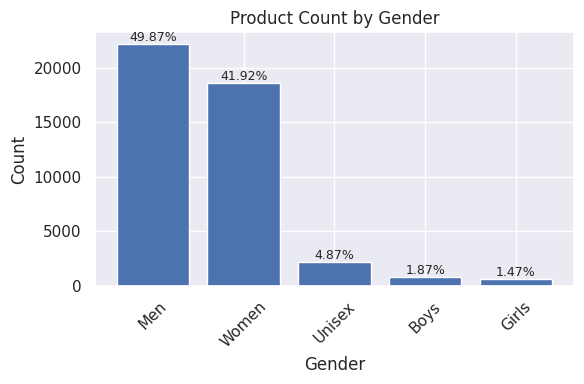

In [94]:
# Plot gender distribution based on existing variables
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_counts.index, gender_counts.values)

# Annotate each bar with its percentage value
for bar, pct in zip(bars, gender_pct.values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{pct:.2f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Product Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trend of Gender Categories Over the Years

To see whether the assortment for each gender has grown or shrunk over time,
we will:

1. **Aggregate** the dataset by `year`×`gender`, counting the number of products in each combination.
2. **Pivot** the result so every gender becomes its own column (wide format).
3. **Plot** a multi‑line chart, one line per gender, to visualise year‑to‑year trends.


gender,Boys,Girls,Men,Unisex,Women
year,,,,,
2007,0,0,2,0,0
2008,1,1,5,0,0
2009,0,0,16,1,3
2010,0,2,576,59,209
2011,164,145,9015,751,3614
2012,646,485,6529,590,8041
2013,11,5,751,108,338
2014,0,0,81,9,146
2015,0,1,318,280,2181


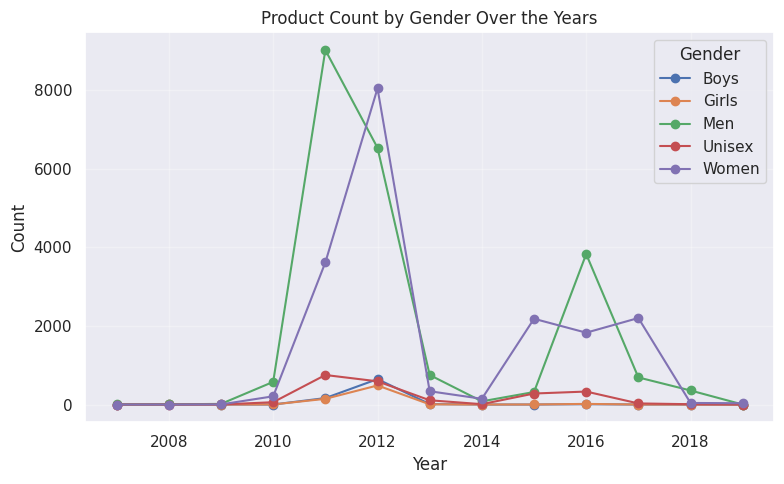

In [95]:
# ---------- 1. Aggregate by year and gender ----------
year_gender = (
    df.groupby(["year", "gender"])
      .size()
      .reset_index(name="count")
)

# ---------- 2. Pivot to wide format ----------
trend_df = (
    year_gender.pivot(index="year", columns="gender", values="count")
               .fillna(0)
               .astype(int)
               .sort_index()
)

display(trend_df.head(10))

# ---------- 3. Plot multi‑line chart ----------
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for gender in trend_df.columns:
    plt.plot(trend_df.index, trend_df[gender], marker="o", label=gender)

plt.title("Product Count by Gender Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


## Season Distribution

We want to understand how many products are assigned to each fashion season
and what share of the total each season represents.

Steps:

1. **Count** products per `season`.
2. **Calculate** the percentage of each season relative to the whole dataset.
3. **Visualise** the distribution with a pie chart.


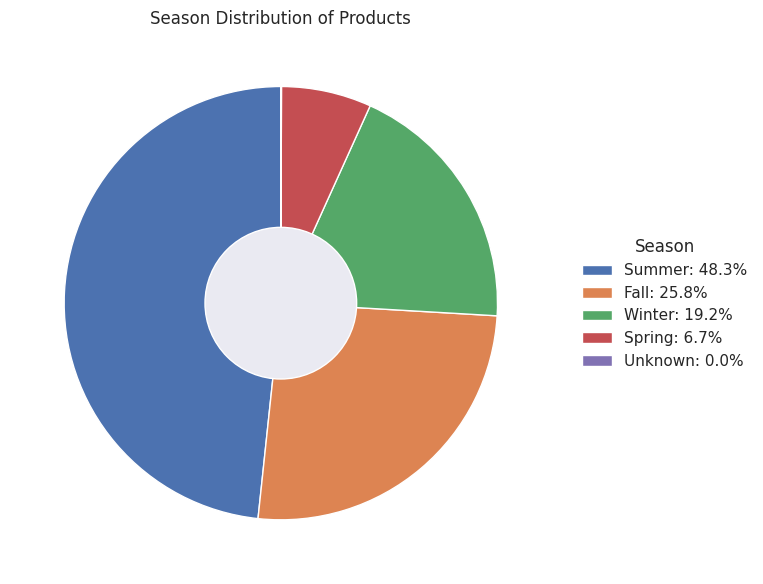

In [96]:
season_counts = df["season"].value_counts()
season_pct    = df["season"].value_counts(normalize=True).mul(100).round(1)

# Build labels for the legend: "<Season>: <xx.x>%"
legend_labels = [
    f"{season}: {pct:.1f}%"
    for season, pct in zip(season_counts.index, season_pct.values)
]

# Plot the pie without labels on the wedges
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(
    season_counts.values,
    startangle=90,           # rotate so the first slice starts at the top
    wedgeprops=dict(width=0.9, edgecolor="w")  # slightly “donut‑like” ➜ less label clutter
)

centre = plt.Circle((0, 0), 0.35, fc=ax.get_facecolor())
ax.add_artist(centre)

# Put the legend to the right
ax.legend(
    wedges,
    legend_labels,
    title="Season",
    loc="center left",
    bbox_to_anchor=(1.03, 0.5),   # x‑offset 1.03 ➜ outside the plot
    frameon=False
)

ax.set_title("Season Distribution of Products")
plt.tight_layout()
plt.show()


## Season Trend by Year

We would like to see how the inventory for each season evolves over time.
The steps are identical to the gender‑trend section but using the
`season` column.

1. **Group** by `year×season`, counting products in each combination.
2. **Pivot** to wide format (`year` as rows, one column per season).
3. **Plot** a multi‑line chart with **seaborn** to visualise trends.


season,Fall,Spring,Summer,Unknown,Winter
year,,,,,
2007,0,2,0,0,0
2008,1,3,2,0,1
2009,19,0,1,0,0
2010,640,3,133,0,70
2011,8749,80,4683,20,157


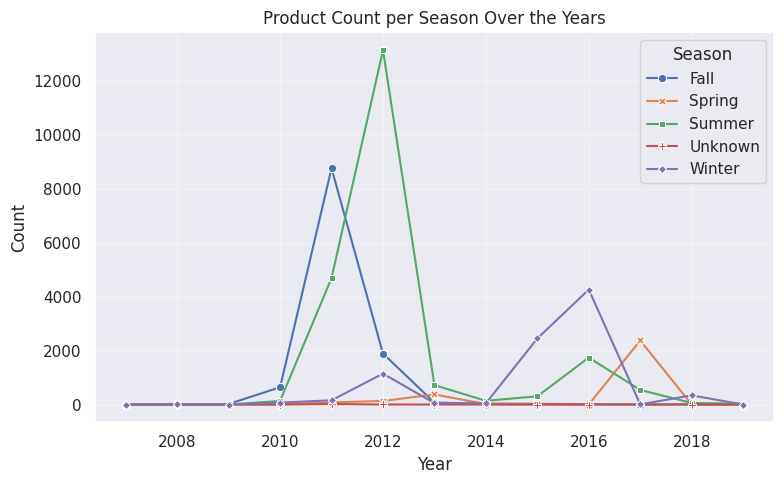

In [97]:
# ---------- 1. Aggregate by year and season ----------
year_season = (
    df.groupby(["year", "season"])
      .size()
      .reset_index(name="count")
)

# ---------- 2. Pivot to wide format ----------
season_trend = (
    year_season.pivot(index="year", columns="season", values="count")
               .fillna(0)
               .astype(int)
               .sort_index()
)

display(season_trend.head())

# ---------- 3. Plot with seaborn ----------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Create one line per season
sns.lineplot(
    data=season_trend,
    markers=True,          # draw dots at each year
    dashes=False           # solid lines
)

plt.title("Product Count per Season Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.legend(title="Season")
plt.tight_layout()
plt.show()


## Association‑Rule Mining (Apriori)

We treat every product row as a “basket” that contains
category‑attribute items such as:

* `gender_Men`
* `season_Winter`
* `usage_Casual`
* `article_type_Tshirts`
* `base_colour_Black`

Using **mlxtend** we:

1. One‑hot encode the categorical features into a boolean matrix.
2. Run **Apriori** with `min_support = 0.05` to get frequent itemsets.
3. Create association rules, filtering by `lift ≥ 1.1`.
4. List the top‑10 rules sorted by lift.


In [98]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Select columns for transactions
cols = ["gender", "season", "usage",
        "master_category", "article_type", "base_colour"]

# Build item strings: columnname_value
df_items = (
    df[cols]
    .astype(str)
    .apply(lambda s: s.name + "_" + s)
)

# 2. One‑hot encode
basket = pd.get_dummies(df_items)

# 3. Apriori frequent itemsets (support ≥ %)
freq_items = apriori(
    basket,
    min_support=0.05,
    use_colnames=True
)

# 4. Association rules (lift ≥ 1.1)
rules = association_rules(
    freq_items,
    metric="lift",
    min_threshold=1.1
).sort_values("lift", ascending=False)

# Show top‑10 rules
display(rules.head(10)[[
    "antecedents", "consequents",
    "support", "confidence", "lift"
]])


,antecedents,consequents,support,confidence,lift
31,(season_season_Spring),(master_category_master_category_Personal Care),0.053233,0.792630,14.654420
30,(master_category_master_category_Personal Care),(season_season_Spring),0.053233,0.984193,14.654420
358,(article_type_article_type_Watches),"(usage_usage_Casual, season_season_Winter, mas...",0.053638,0.937844,8.093869
347,"(usage_usage_Casual, season_season_Winter, mas...",(article_type_article_type_Watches),0.053638,0.462913,8.093869
216,"(season_season_Winter, master_category_master_...",(article_type_article_type_Watches),0.055663,0.459766,8.038848
217,(article_type_article_type_Watches),"(season_season_Winter, master_category_master_...",0.055663,0.973249,8.038848
351,"(usage_usage_Casual, article_type_article_type...","(season_season_Winter, master_category_master_...",0.053638,0.973061,8.037294
354,"(season_season_Winter, master_category_master_...","(usage_usage_Casual, article_type_article_type...",0.053638,0.443040,8.037294
246,"(usage_usage_Casual, master_category_master_ca...",(article_type_article_type_Casual Shoes),0.063290,0.433303,6.766888
251,(article_type_article_type_Casual Shoes),"(usage_usage_Casual, master_category_master_ca...",0.063290,0.988405,6.766888


## Formatting Association Rules for Presentation

We will take the raw `rules` DataFrame and:

1. **Copy** it so the original is preserved.
2. **Prettify** the `antecedents` and `consequents` by removing the `"column_value_"` prefixes and joining terms with “ + ”.
3. **Convert** `support` and `confidence` into percentages (rounded to 1 decimal place).
4. **Rename** columns to clear, human‑friendly labels and select only the key columns.
5. **Show** the top 10 rules sorted by **Lift**.


In [99]:
# 1. Re‑run association_rules to get a fresh DataFrame with frozensets
raw_rules = association_rules(
    freq_items,
    metric="lift",
    min_threshold=1.1
).sort_values("lift", ascending=False)

# 2. Take the top 10 by Lift
top10 = raw_rules.nlargest(10, "lift").copy()

# 3. Prettifier that splits on the last underscore of each frozenset element
def prettify_itemset(fs):
    return " + ".join(
        sorted(elem.rsplit("_", 1)[-1] for elem in fs)
    )

# 4. Create human‑friendly columns
top10["Antecedent"]  = top10["antecedents"].apply(prettify_itemset)
top10["Consequent"]  = top10["consequents"].apply(prettify_itemset)
top10["Support (%)"]    = (top10["support"]    * 100).round(1)
top10["Confidence (%)"] = (top10["confidence"] * 100).round(1)
top10 = top10.rename(columns={"lift": "Lift"})

# 5. Select and display final table
final = top10[[
    "Antecedent",
    "Consequent",
    "Support (%)",
    "Confidence (%)",
    "Lift"
]]

display(final.reset_index(drop=True))

,Antecedent,Consequent,Support (%),Confidence (%),Lift
0,Spring,Personal Care,5.3,79.3,14.654420
1,Personal Care,Spring,5.3,98.4,14.654420
2,Watches,Accessories + Casual + Winter,5.4,93.8,8.093869
3,Accessories + Casual + Winter,Watches,5.4,46.3,8.093869
4,Accessories + Winter,Watches,5.6,46.0,8.038848
5,Watches,Accessories + Winter,5.6,97.3,8.038848
6,Casual + Watches,Accessories + Winter,5.4,97.3,8.037294
7,Accessories + Winter,Casual + Watches,5.4,44.3,8.037294
8,Casual + Footwear,Casual Shoes,6.3,43.3,6.766888
9,Casual Shoes,Casual + Footwear,6.3,98.8,6.766888


## Key Business Takeaways

- **“Personal Care” → Spring**
  Almost every product in the Personal Care category is tagged for the Spring season (Support 5.3%, Confidence 98.4%, Lift 14.7).
  → **Action:** Plan your major launches and promotions for cosmetics, fragrances and personal‐care items in early Spring.

- **Spring → “Personal Care”**
  When a product is marked as Spring, there’s a 79.3% chance it falls into Personal Care (same high Lift).
  → **Action:** Prioritize Personal Care in your Spring marketing—Spring shoppers are primarily looking for self‑care products.

- **Watches ↔ Casual + Winter**
  “Watches” come with Winter season and Casual usage very frequently (Support 5.4%, Confidence 93.8%, Lift 8.1).
  → **Action:** Feature watches prominently in your Winter casual collections and bundle them with other casual accessories.

- **Accessories + Winter → Watches**
  If an item is an “Accessories” piece tagged Winter, nearly half the time it’s a watch (Confidence 46.3%, Lift 8.1).
  → **Action:** Cross‑sell watches on all Winter accessory pages and recommend them as a focal product.

- **Casual Shoes → Casual + Footwear**
  “Casual Shoes” almost always belong to the broader Footwear category (Support 6.3%, Confidence 98.8%, Lift 6.8).
  → **Action:** On any Casual Shoes page, prominently suggest other Footwear items (e.g. sneakers, loafers) to boost basket size.


## Visualizing the Top Association Rules

We’ll create a **horizontal bar chart** of the top 10 rules sorted by **Lift**, with:

1. **Antecedent** on the Y‑axis (each rule’s “if” part).
2. **Lift** on the X‑axis (strength of the rule).
3. **Color** of each bar indicates the **Consequent** (the “then” part).
4. **Annotations** showing `Support (%) / Confidence (%)` at the end of each bar.

This view makes it immediately obvious which rules are strongest and what actions to take.


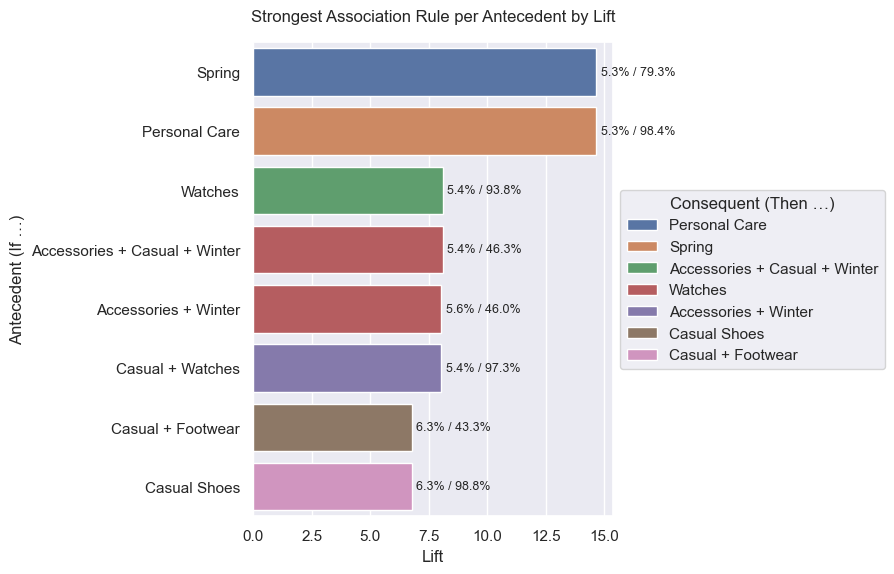

In [100]:
# 1. Pick the strongest rule per Antecedent
best_rules = (
    final
    .sort_values("Lift", ascending=False)
    .drop_duplicates("Antecedent", keep="first")
    .reset_index(drop=True)
)

sns.set_theme(style="darkgrid")

# 2. Create figure & axes
fig, ax = plt.subplots(figsize=(12, 6))

# 3. Plot horizontal bars
bars = sns.barplot(
    data=best_rules,
    x="Lift",
    y="Antecedent",
    hue="Consequent",
    dodge=False,
    ax=ax
)

# 4. Annotate each bar with "Support% / Confidence%"
for bar, support, conf in zip(
    bars.patches,
    best_rules["Support (%)"],
    best_rules["Confidence (%)"]
):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        x + 0.2,
        y,
        f"{support:.1f}% / {conf:.1f}%",
        va="center",
        fontsize=9
    )

# 5. Move legend fully to the right, outside plot area
ax.legend(
    title="Consequent (Then …)",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),  # centered vertically
    borderaxespad=0
)

# 6. Adjust margins so nothing overlaps
plt.subplots_adjust(left=0.30, right=0.60, top=0.90)

# 7. Labels and title
ax.set_title("Strongest Association Rule per Antecedent by Lift", pad=15)
ax.set_xlabel("Lift")
ax.set_ylabel("Antecedent (If …)")

plt.show()

## Segment-Specific Association Rules (Men vs Women)

We will split our cleaned dataset into two subsets by `gender` – **Men** and **Women** – and then for each segment:

1. **One-hot encode** the same set of categorical features (`gender` excluded, since it’s constant) into a binary “basket” matrix.
2. **Run Apriori** (min_support = 0.05) to find frequent itemsets within that segment.
3. **Generate association rules** with `lift ≥ 1.1`.
4. **Display** the top 5 rules by lift for each segment to see which “if A → then B” patterns are strongest in Men’s vs Women’s products.


In [101]:
# Columns to encode
cols = ["season", "usage", "master_category", "article_type", "base_colour"]

segment_rules = {}

for segment in ["Men", "Women"]:
    # 1. Subset
    df_seg = df[df["gender"] == segment]

    # 2. One-hot encode: "colname_value" → dummy variable
    basket = pd.get_dummies(
        df_seg[cols]
        .astype(str)
        .apply(lambda col: col.name + "_" + col)  # prefix each value
    )

    # 3. Apriori frequent itemsets (support ≥ 5%)
    freq_items = apriori(basket, min_support=0.05, use_colnames=True)

    # 4. Association rules (lift ≥ 1.1)
    rules_seg = association_rules(freq_items, metric="lift", min_threshold=1.1)
    rules_seg = rules_seg.sort_values("lift", ascending=False).reset_index(drop=True)

    # 5. Prettify and convert metrics
    def prettify(fs):
        return " + ".join(sorted(item.rsplit("_", 1)[-1] for item in fs))

    rules_seg["Antecedent"]      = rules_seg["antecedents"].apply(prettify)
    rules_seg["Consequent"]      = rules_seg["consequents"].apply(prettify)
    rules_seg["Support (%)"]     = (rules_seg["support"]    * 100).round(1)
    rules_seg["Confidence (%)"]  = (rules_seg["confidence"] * 100).round(1)
    rules_display = rules_seg[[
        "Antecedent", "Consequent", "Support (%)", "Confidence (%)", "lift"
    ]].rename(columns={"lift": "Lift"})

    segment_rules[segment] = rules_display.head(5)

# 6. Show results
for segment, table in segment_rules.items():
    print(f"\n### Top 5 Rules for {segment}")
    display(table)


### Top 5 Rules for Men


,Antecedent,Consequent,Support (%),Confidence (%),Lift
0,Footwear + Sports,Sports Shoes,7.0,98.4,13.719678
1,Sports Shoes,Footwear + Sports,7.0,97.8,13.719678
2,Accessories + Casual + Winter,Watches,6.2,63.5,9.556181
3,Watches,Accessories + Casual + Winter,6.2,93.7,9.556181
4,Accessories + Winter,Casual + Watches,6.2,60.8,9.473434



### Top 5 Rules for Women


,Antecedent,Consequent,Support (%),Confidence (%),Lift
0,Casual + Spring,Personal Care,8.1,93.7,9.651119
1,Personal Care,Casual + Spring,8.1,83.9,9.651119
2,Footwear + Winter,Casual + Heels,5.4,66.6,9.644956
3,Casual + Heels,Footwear + Winter,5.4,77.7,9.644956
4,Heels,Casual + Footwear + Winter,5.4,75.6,9.626911


## Top 5 Association Rules for Men

| Antecedent                          | Consequent                      | Support (%) | Confidence (%) | Lift   |
|-------------------------------------|---------------------------------|-------------|----------------|--------|
| Footwear + Sports                   | Sports Shoes                    | 7.0         | 98.4           | 13.72  |
| Sports Shoes                        | Footwear + Sports               | 7.0         | 97.8           | 13.72  |
| Accessories + Casual + Winter       | Watches                         | 6.2         | 63.5           | 9.56   |
| Watches                             | Accessories + Casual + Winter   | 6.2         | 93.7           | 9.56   |
| Accessories + Winter                | Casual + Watches                | 6.2         | 60.8           | 9.47   |

**Key Insights for Men**
- **Footwear + Sports → Sports Shoes**
  Almost every item tagged as both “Footwear” and “Sports” is specifically a Sports Shoes (Lift 13.7, Confidence 98%).
- **Sports Shoes → Footwear + Sports**
  If a product is a Sports Shoes, it virtually always falls under Footwear + Sports (Lift 13.7, Confidence 97.8%).
- **Watches ↔ Accessories + Casual + Winter**
  Watches strongly co-occur with winter casual accessories (Lift 9.56, Conf 93.7%), but only 63.5% of “Accessories + Casual + Winter” are watches.
- **Accessories + Winter → Casual + Watches**
  About 60.8% of winter accessories tagged “Accessories + Winter” are in the Casual + Watches segment (Lift 9.47).

---

## Top 5 Association Rules for Women

| Antecedent                          | Consequent                           | Support (%) | Confidence (%) | Lift   |
|-------------------------------------|--------------------------------------|-------------|----------------|--------|
| Casual + Spring                     | Personal Care                        | 8.1         | 93.7           | 9.65   |
| Personal Care                       | Casual + Spring                      | 8.1         | 83.9           | 9.65   |
| Footwear + Winter                   | Casual + Heels                       | 5.4         | 66.6           | 9.64   |
| Casual + Heels                      | Footwear + Winter                    | 5.4         | 77.7           | 9.64   |
| Heels                               | Casual + Footwear + Winter           | 5.4         | 75.6           | 9.63   |

**Key Insights for Women**
- **Casual + Spring → Personal Care**
  Nearly all women’s casual spring items are Personal Care products (Lift 9.65, Conf 93.7%).
- **Personal Care → Casual + Spring**
  When a women’s product is in Personal Care, 83.9% of the time it’s tagged as Casual + Spring.
- **Footwear + Winter → Casual + Heels**
  Winter footwear for women often includes heels (Lift 9.64, Conf 66.6%).
- **Casual + Heels → Footwear + Winter**
  Casual Heels are strongly associated with the Winter Footwear category (Lift 9.64, Conf 77.7%).
- **Heels → Casual + Footwear + Winter**
  75.6% of “Heels” belong to the combined segment Casual + Footwear + Winter (Lift 9.63).

---

### Business Recommendations

- **Men’s segment**:
  • Emphasize Sports Shoes in your Sports Footwear campaign.
  • Promote watches as a key winter accessory in Casual collections.

- **Women’s segment**:
  • Bundle Personal Care with Casual Spring promotions.
  • Feature heels prominently in your Winter Footwear lineup and cross-sell with casual heels.


## Segment-Specific Association-Rule Graphs

Below we visualise the top 10 association rules for **Men** (left) and **Women** (right).

- **Nodes** represent individual attributes (e.g. Spring, Casual Shoes, Watches).
- A **directed edge** “A → B” means “If A, then B.”
- **Edge width** ∝ **Lift** of the rule (stronger links are thicker).
- **Edge colour** ∝ **Confidence** of the rule (higher confidence is more saturated).

These side-by-side graphs make it easy to compare the strongest “if…then…” patterns in the Men’s vs Women’s segments, and tailor merchandising accordingly.


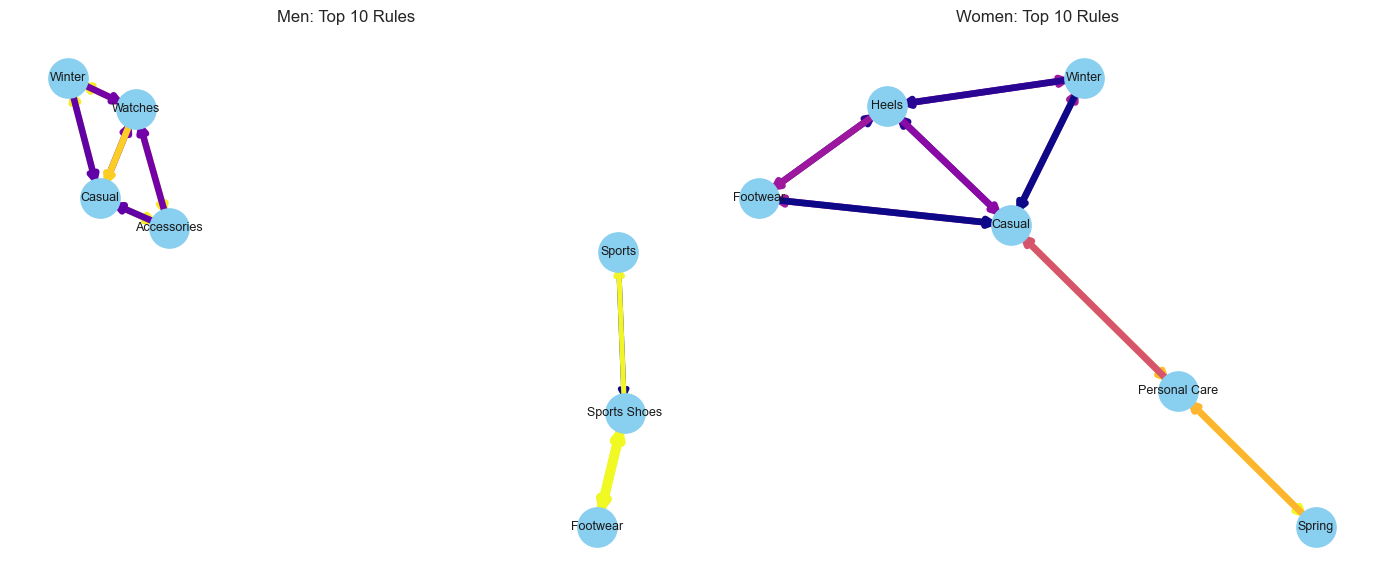

In [102]:
import networkx as nx

def plot_assoc_graph(rules_df, title, ax):
    G = nx.DiGraph()
    for _, row in rules_df.iterrows():
        ants = row["antecedents"]
        cons = row["consequents"]
        for a in ants:
            for c in cons:
                G.add_edge(
                    a.rsplit("_",1)[-1],
                    c.rsplit("_",1)[-1],
                    weight=row["lift"],
                    confidence=row["confidence"]
                )
    pos = nx.spring_layout(G, k=1, seed=42)

    edges = G.edges(data=True)
    widths = [d["weight"] for (_,_,d) in edges]
    colors = [d["confidence"] for (_,_,d) in edges]
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=800, node_color="#89CFF0")
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=9)
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        arrowstyle="->",
        arrowsize=12,
        width=[w/2 for w in widths],
        edge_color=colors,
        edge_cmap=plt.cm.plasma
    )
    ax.set_title(title)
    ax.axis("off")

from mlxtend.frequent_patterns import apriori, association_rules

def top_rules_for_segment(seg_name):
    df_seg = df[df["gender"] == seg_name]
    basket = pd.get_dummies(
        df_seg[cols]
        .astype(str)
        .apply(lambda col: col.name + "_" + col)
    )
    freq = apriori(basket, min_support=0.05, use_colnames=True)
    r = association_rules(freq, metric="lift", min_threshold=1.1)
    return r.nlargest(10, "lift")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plt.rcParams["font.family"] = "DejaVu Sans"

plot_assoc_graph(top_rules_for_segment("Men"),   "Men: Top 10 Rules",   ax1)
plot_assoc_graph(top_rules_for_segment("Women"), "Women: Top 10 Rules", ax2)

plt.tight_layout()
plt.show()
